# COMPSCI 527 Homework 3

Write the names of all contributors to this assignment here:

+ Haozhe Zhang
+ Felipe

## Part 1: Orthogonality and the SVD

### Problem 1.1 (Exam-Style)

Note that an orthogonal matrix is a square matrix whose columns and rows are orthogonal unit vectors(i.e. orthonormal vectors) then $Q^TQ = QQ^T = I$. This leads to the equivalent characterization: a matrix $Q$ is orthogonal if its transpose is equal to its inverse $Q^T = Q^{-1}$. Another fact to know is that orthogonal matrix is always diagonalizable. 

Following the hint, we first write out the eigenvalue equation $Uv = \lambda v$. Then, we take the Hermitian of both sides and we end up with $v^HU^T = \bar{\lambda}v^H$. This is because $U$ is real. Then, let's multiply this to the original equation on the both sides $v^HU^TUv = \bar{\lambda}v^H\lambda v$. Note since $U$ is also orthogonal so we can simplify this to be
$$ v^Hv = \bar{\lambda}\lambda v^Hv$$
Also, because $v$ is an eigenvector so it cannot be all zeros. Thus we know $v^Hv \neq \mathbf{0}$. Then,
$$ \bar{\lambda}\lambda = 1 = \sqrt{\bar{\lambda}\lambda}$$
Thus, we proved that all eigenvalues of a square orthogonal real matrix $U$ are complex numbers with absolute value 1.





### Problem 1.2 (Exam-Style)

Using the result we showed before, since $U$ is a square orthogonal real matrix, then all of its eigenvalues have absolute value 1. That is saying it could be either two cases: 
- Real eigenvalue
Then it has to be either 1 or -1
- Complex eigenvalue

Note if we can prove the complex eigenvalues appear in pairs, and then we are done. This is because here n is odd. Let's say $\lambda$ is the eigenvalue, then $Uv = \lambda v$. Now let's take the conjugate of both sides,
$$ \bar{U} \bar{v} = \bar{\lambda}\bar{v} $$
Since $U$ is actually real, so 
$$U\bar{v} = \bar{\lambda}\bar{v}$$
Then we showed $\bar{\lambda}$ is indeed another eigenvalue. Thus, we showed complex eigenvalues appear in pairs and since n is odd, then there has to be at least one eigenvalue that is equal to either 1 or -1.

### Problem 1.3 (Exam-Style)

Note that a notation matrix is a real square orthogonal matrix with determinant 1. Also, recall a well-known fact from undergraduate linear algebra class, which is the product of the n eigenvalues of A is the same as the determinant of A.

Since the rotation matrix is a real square orthogonal matrix and n is 3, which is odd, by the previous result we know there has to be at least one eigenvalue that is either 1 or -1. Actually, we can exhaust all the scenearios for eigenvalues with the additional assumption of the rotation matrix has determinant 1.

- 1, 1, 1
- 1, -1, -1
- 1, and a pair of complex eigenvalues whose product is 1.

They are only cases satisfy all the conditions above, then, we know in every case $\lambda = 1$ is an eigenvalue. Thus, we know there exists an x such that:
$$ Rx = x$$
This line is called an axis of rotation for $R$.

### Problem 1.4 (Exam-Style)

I think the intuition behind SVD is that an m by n matrix U of rank r maps the r-dimensional unit hypersphere in rowspace(U) into an r-dimensional hyperellipse in range(U).

Also, I view that A maps an orthogonal basis of the size of the columns into the orthogonal basis of the size of the rows. Since vectors in the orthogonal basis actually have norm 1, then the singular values actually is just to show how the matrix is streching and compressing the vectors. However, here we assume U is a real orthogonal matrix, then we know when apply it to a vector it does not change the maginitude of the vectors, thus there is actully no streching/compressing, so the singular values must be 1.

Just a little illustration to complement the intuition. 
$$||Av_i|| = ||v_i||=1 = ||\sigma_i u_i|| = ||\sigma_i||$$
Since the singular values are always non-negative, and from above, we know all the singular values of a real orthogonal matrix U must 1.

### Problem 1.5 (Exam-Style)

$$F = \begin{bmatrix} -1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

### Problem 1.6 (Exam-Style)

A couple known facts before the proof. The determinant of orthogonal matrix is either 1 or -1. $det(AB) = det(A)det(B)$.

Since we assume U is just a real orthogonal n by n matrix, by results showed above, we know all of its singular values are 1. then we can write it like the following.
$$ U = W I V^T$$
Then,
$$det(U) = det(WIV^T) =det(W)det(I)det(V^T) = det(W)det(V^T)$$
Since we know that the $W$ and $V^T$ are orthogonal matrix, the determinant would be either 1 or -1.

- det(W)det(V^T) = 1
Then, we showed the $det(U)=1$, which tells us U is a rotation matrix according to the definition we had above.

- det(W)det(V^T) = -1
Then, $U = FFU$, where $F$ is the canonical flipping matrix we had above. Clearly, $det(FU) = det(F)det(U) = (-1) * (-1) = 1$.
Thus, we know $FU$ must be a rotation matrix, and indeed we can write U as the product of a rotation and a canonical mirror flip.


## Part 2: Singular Values/Vectors and Eigenvalues/Vectors

In [17]:
from math import sqrt

In [18]:
small = 1.e-10

### Problem 2.1

In [261]:
# Just to keep the notation consistent. I assume all the vectors here are row vectors.

def times(X, Y):
    a_1 = X[0][0]*Y[0][0] + X[0][1]*Y[1][0] 
    #print(X[0][0], Y[0][0], X[0][1], Y[1][0])
    a_2 = X[0][0]*Y[0][1] + X[0][1]*Y[1][1] 
    #print(X[0][0], Y[0][1], X[0][1], Y[1][1])
    a_3 = X[1][0]*Y[0][0] + X[1][1]*Y[1][0] 
    a_4 = X[1][0]*Y[0][1] + X[1][1]*Y[1][1] 
    return [[a_1, a_2], [a_3, a_4]]
def transpose(X):
    X_T = [[X[0][0], X[1][0]], [X[0][1], X[1][1]]]
    return X_T

In [262]:
B = test_svd[0]

In [263]:
print(B)

[[1.0, -2.0], [0.0, 3.0]]


In [264]:
print(transpose(B))

[[1.0, 0.0], [-2.0, 3.0]]


In [265]:
print(times(B, transpose(B)))

[[5.0, -6.0], [-6.0, 9.0]]


For two by two matrix, there are actually formula to directly compute the eigenvalues, which is:
$$ \frac{tr(A)\pm \sqrt{tr(A)^2 - 4det(A)} }{2}$$

In [266]:
def eigenvalues(X):
    tr = X[0][0] + X[1][1]
    det = X[0][0]*X[1][1] - X[0][1]*X[0][1]
    lambda1 = (tr + sqrt(tr**2 - 4*det))*0.5
    lambda2 = (tr - sqrt(tr**2 - 4*det))*0.5
    if lambda1 > lambda2:
        return [lambda1, lambda2]
    else:
        return [lambda2, lambda1]

Again, we can actually compute the eigenvectors analytically.
$$A = \begin{bmatrix} a & b  \\ c & d  \end{bmatrix}$$
$ v =\begin{bmatrix} x \\ y \end{bmatrix} $ and it is an eigenvector if it satisfies $(A - \lambda I)v = \mathbf{0}$. Then, we can directly solve for x and y:
$$ v = \begin{bmatrix} b \\ \lambda - a \end{bmatrix}, \begin{bmatrix} \lambda - d \\ c \end{bmatrix} $$ 

In [267]:
def eigenvectors(X, lambdas):
    if lambdas[0] == lambdas[1]:
        return [[1, 0], [0, 1]]
    else:
        eigenvec = []
        for lamb in lambdas:
            v_temp1 = [X[0][1], lamb - X[0][0]]
            v_temp2 = [lamb - X[1][1], X[1][0]]
            if (abs(v_temp1[0])< small) and (abs(v_temp1[1]) <small):
                vec = v_temp2
            else:
                vec = v_temp1
            norm = sqrt(vec[0]**2 + vec[1]**2)
            vec = [v/norm for v in vec]
            eigenvec.append(vec)
        return transpose(eigenvec)

In [268]:
A = [[1,0],[0,1]]

In [269]:
eigenvectors(A, [1,1])

[[1, 0], [0, 1]]

In [270]:
test_eigen = [[[3., 0.], [1., 6.]], [[1., 0.], [0., 2.]],
              [[1., 0.], [0., 1.]], [[2., 0.], [3., 0.]]]


def truncate(X):
    if isinstance(X, list):
        return '[' + ', '.join([truncate(item) for item in X]) + ']'
    else:
        if abs(X) < small:
            X = 0.
        return '{:.3g}'.format(X)


def print_eigen(A, L, V):
    fmt = 'A = {}, lambdas = {}, V = {}'
    print(fmt.format(truncate(A), truncate(L), truncate(V)))

In [271]:
for A in test_eigen:
    L = eigenvalues(A)
    V = eigenvectors(A, L)
    print_eigen(A, L,V)

A = [[3, 0], [1, 6]], lambdas = [6, 3], V = [[0, -0.949], [1, 0.316]]
A = [[1, 0], [0, 2]], lambdas = [2, 1], V = [[0, -1], [1, 0]]
A = [[1, 0], [0, 1]], lambdas = [1, 1], V = [[1, 0], [0, 1]]
A = [[2, 0], [3, 0]], lambdas = [2, 0], V = [[0.555, 0], [0.832, -1]]


### Problem 2.2

In [341]:
def svd(A):
    Q = times(transpose(A), A)
    P = times(A, transpose(A))
    eigenval = eigenvalues(Q)
    V = eigenvectors(Q, eigenval)
    for i in range(len(eigenval)):
        if eigenval[i] < 0 :
            S[i] = sqrt(-eigenval[i])
        else:
            S[i] = sqrt(eigenval[i])
    eigenval = eigenvalues(P)
    U = eigenvectors(P, eigenval)
    M = [[S[0],0], [0, S[1]]]
    N_1 = times(A, V)  
    N_2 = times(U, M)
    for i in range(len(N_1)):
        if (abs(N_1[0][i] - N_2[0][i]) > small) or (abs(N_1[1][i] - N_2[1][i]) > small):
            U[0][i] = -U[0][i]
            U[1][i] = -U[1][i]
    return U, S, V

In [342]:
import numpy as np


def compare(f, A):
    def is_svd(U, S, V, A):
        u = np.array(U)
        d = np.array(S)
        if d.ndim != 1:
            return False
        s = np.diag(d)
        v = np.array(V)
        a = np.array(A)
        if s.shape != a.shape:
            return False
        if u.shape != (a.shape[0], a.shape[0]):
            return False
        if v.shape != (a.shape[1], a.shape[1]):
            return False
        medium = sqrt(small)
        if np.linalg.norm(np.matmul(np.transpose(u), u) -
                          np.eye(u.shape[0])) > medium:
            return False
        if np.linalg.norm(np.matmul(np.transpose(v), v) -
                          np.eye(v.shape[0])) > medium:
            return False
        if np.linalg.norm(np.matmul(u, np.matmul(s, np.transpose(v))) -
                          a) > medium:
            return False
        return True

    def flip_if_needed(Un, Sn, Vn, U, V):
        for k in range(2):
            vn, v = Vn[:, k], np.array([V[0][k], V[1][k]])
            if np.dot(vn, v) < 0.:
                Un[:, k] = -Un[:, k]
                Vn[:, k] = -Vn[:, k]
            if abs(Sn[k]) < small:
                un, u = Un[:, k], np.array([U[0][k], U[1][k]])
                if np.dot(un, u) < 0.:
                    Un[:, k] = -Un[:, k]

    U, S, V = f(A)
    Un, Sn, VTn = np.linalg.svd(np.array(A))
    Vn = np.transpose(VTn)
    flip_if_needed(Un, Sn, Vn, U, V)
    print('A = {}'.format(A), end=': Computed SVD ')
    if is_svd(U, S, V, A):
        print('is OK')
    else:
        print('differs from the numpy version:')
        for mine, theirs, name in ((U, Un.tolist(), 'U'),
                                   (S, Sn.tolist(), 'S'),
                                   (V, Vn.tolist(), 'V')):
            fmt = '       my {} = {},\n    numpy {} = {}'
            print(fmt.format(name, truncate(mine), name,
                             truncate(theirs)))
        print()



test_svd = [[[1., -2.], [0., 3.]], [[6.0, -4.0], [-3.0, 2.0]],
              [[1., 0.], [0., 1.]], [[0., 0.], [0., 1.]],
              [[0., 1.], [2., 0.]], [[0., -1.], [2., 0.]],
              [[0., 0.], [0., 0.]]]

In [343]:
for case in test_svd:
    compare(svd, case)

A = [[1.0, -2.0], [0.0, 3.0]]: Computed SVD is OK
A = [[6.0, -4.0], [-3.0, 2.0]]: Computed SVD is OK
A = [[1.0, 0.0], [0.0, 1.0]]: Computed SVD is OK
A = [[0.0, 0.0], [0.0, 1.0]]: Computed SVD is OK
A = [[0.0, 1.0], [2.0, 0.0]]: Computed SVD is OK
A = [[0.0, -1.0], [2.0, 0.0]]: Computed SVD is OK
A = [[0.0, 0.0], [0.0, 0.0]]: Computed SVD is OK


## Part 3: Principal Component Analysis 

### Problem 3.1

In [520]:
# Your code here
def expand(matrix):
    L = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            L.append(matrix[i,j])
    return L
def image_to_matrix(image, log_k):
    n = image.shape[0]
    k = 2**log_k
    log_n = np.log2(n)
    windows = 2**(log_n - log_k)
    windows = int(windows)
    mat = []
    for j in range(windows):
        for i in range(windows):
            A = image[0+k*j:k+k*j, 0 + k*i :k +k*i]
            A = expand(A)
            mat.append(A)
    mat = np.array(mat, dtype = float)
    return mat

def anti_expand(L):
    leng = len(L)
    sqrt_L = int(sqrt(leng))
    toreturn = []
    for i in range(sqrt_L):
        lis = L[i*sqrt_L:(i+1)*sqrt_L]
        toreturn.append(lis)
    toreturn = np.array(toreturn, dtype = np.uint8)
    return toreturn
    
def matrix_to_image(matrix):
    n = matrix.shape[0]
    l = matrix.shape[1]
    sqrt_l = int(sqrt(l))
    size = int(sqrt(n*l))
    windows = int(size/sqrt_l)
    img = np.eye(size)
    rep = 0
    for i in range(windows):
        for j in range(windows): 
            vec = list(matrix[rep, :])
            block  = anti_expand(vec)
            img[0+i*sqrt_l: sqrt_l+i*sqrt_l,  0+j*sqrt_l: sqrt_l+j*sqrt_l] = block
            rep +=1
    img = np.array(img, dtype = np.uint8)
    return img

In [536]:
def test_image():
    n = 8
    array = [[10 * row + column for column in range(n)] for row in range(n)]
    return np.array(array, dtype=np.uint8)

try:
    I, log_k = test_image(), 2
    M = image_to_matrix(I, log_k)
    R = matrix_to_image(M)
    print('Matrix for log_k={}:\n{}'.format(log_k, M), end='\n\n')
    print('Type of reconstruction is {}'.format(R.dtype))
    print('Norm of difference is {}'.format(np.linalg.norm(\
        R.astype(float)-I.astype(float))), end='\n\n')
except NameError:
    print('Some functions are not yet implemented')

Matrix for log_k=2:
[[ 0.  1.  2.  3. 10. 11. 12. 13. 20. 21. 22. 23. 30. 31. 32. 33.]
 [ 4.  5.  6.  7. 14. 15. 16. 17. 24. 25. 26. 27. 34. 35. 36. 37.]
 [40. 41. 42. 43. 50. 51. 52. 53. 60. 61. 62. 63. 70. 71. 72. 73.]
 [44. 45. 46. 47. 54. 55. 56. 57. 64. 65. 66. 67. 74. 75. 76. 77.]]

Type of reconstruction is uint8
Norm of difference is 0.0



### Problem 3.2

In [544]:
from sklearn.decomposition import PCA
from types import SimpleNamespace

def full_image_pca(image, log_k):
    matrix = image_to_matrix(image, log_k)
    pca = PCA(svd_solver='full')
    pca.fit(matrix)
    return SimpleNamespace(mean=pca.mean_, sigmas=pca.singular_values_,
                           U=pca.components_, UT=np.transpose(pca.components_),
                           log_k=log_k)


def transformations(pca, n_components):
    mean = pca.mean
    forward = pca.UT[:, :n_components]
    backward = pca.U[:n_components, :]
    log_k = pca.log_k

    def compressor(image):
        compressed = image_to_matrix(image, log_k)
        return np.dot(compressed - mean, forward)

    def decompressor(matrix):
        decompressed = np.dot(matrix, backward) + mean
        return matrix_to_image(decompressed)

    return compressor, decompressor

In [538]:
from imageio import imread

In [540]:
breakfast = imread('breakfast.png')

In [553]:
full_pca = full_image_pca(breakfast, 3)

In [554]:
sigmas = full_pca.sigmas

In [564]:
leng = len(sigmas)
x = list(range(0, leng, 1))

In [565]:
len(x)

64

In [566]:

import matplotlib.pyplot as plt

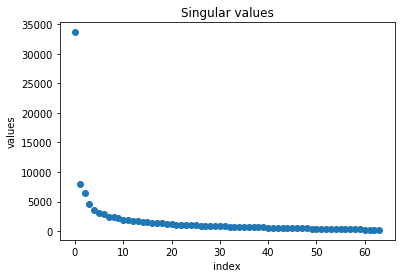

In [569]:
plt.scatter(x, sigmas)
plt.title('Singular values')
plt.xlabel("index")
plt.ylabel("values")
plt.show()

### Problem 3.3

In [606]:
def anti_expand_float(L):
    leng = len(L)
    sqrt_L = int(sqrt(leng))
    toreturn = []
    for i in range(sqrt_L):
        lis = L[i*sqrt_L:(i+1)*sqrt_L]
        toreturn.append(lis)
    toreturn = np.array(toreturn, dtype = float)
    return toreturn

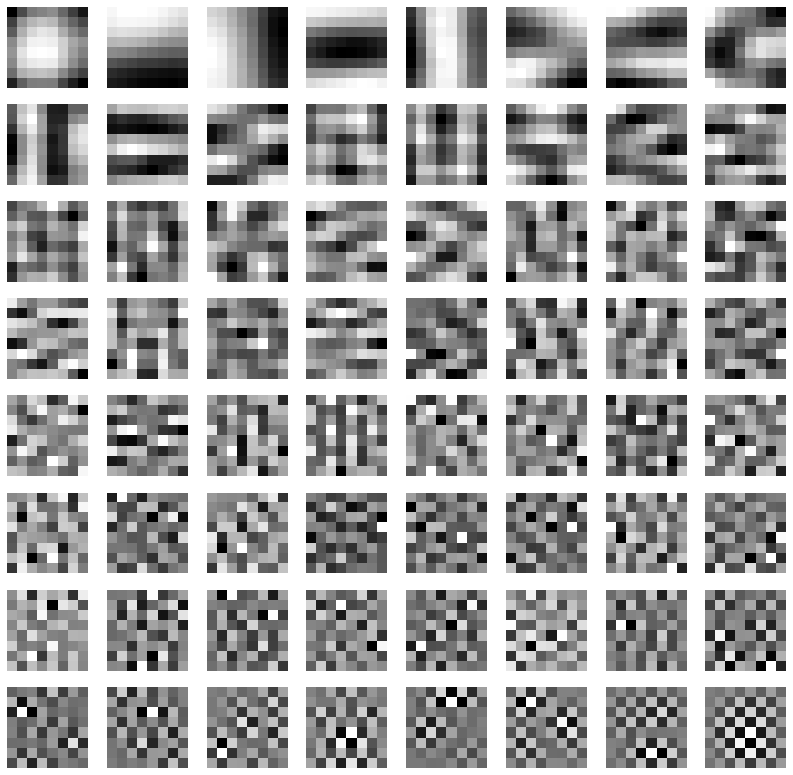

In [614]:
fig, axes = plt.subplots(nrows = 8, ncols = 8, figsize =(14,14))
cmap = plt.get_cmap('gray')
Us = full_pca.U
n = Us.shape[0]
sqrt_n = int(sqrt(n))
rep = 0
for i in range(sqrt_n):
    for j in range(sqrt_n):
        vec = list(Us[rep,:])
        block = anti_expand_float(vec)
        axes[i, j].imshow(block, cmap = cmap)
        axes[i,j].axis('off')
        rep +=1
        

### Problem 3.4

In [750]:
compressor, decompressor = transformations(full_pca, n_components=6)

In [752]:
mat = compressor(breakfast)

In [620]:
compre_img = decompressor(mat)

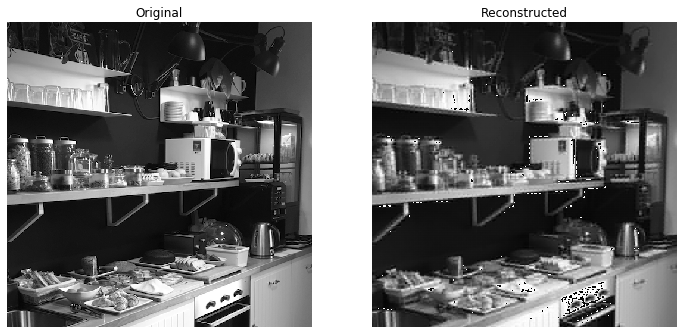

In [624]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize =(12,14))
cmap = plt.get_cmap('gray')
axes[0].imshow(breakfast, cmap = cmap)
axes[0].axis('off')
axes[0].set(title='Original')
axes[1].imshow(compre_img, cmap = cmap)
axes[1].axis('off')
axes[1].set(title='Reconstructed')
plt.show()

### Problem 3.5

In [625]:
treviso = imread('treviso.png')

In [626]:
mat_tre = compressor(treviso, )

In [627]:
recon_img = decompressor(mat_tre)

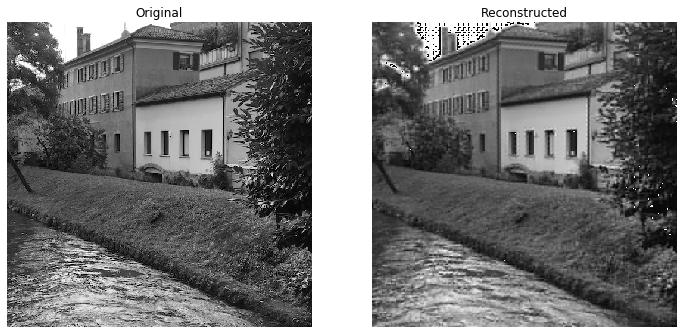

In [628]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize =(12,14))
cmap = plt.get_cmap('gray')
axes[0].imshow(treviso, cmap = cmap)
axes[0].axis('off')
axes[0].set(title='Original')
axes[1].imshow(recon_img, cmap = cmap)
axes[1].axis('off')
axes[1].set(title='Reconstructed')
plt.show()

In [636]:
img = breakfast

In [647]:
np.max(img)

255

In [649]:
np.max(compre_img)

255

In [641]:
img.shape

(512, 512)

In [642]:
compre_img.shape

(512, 512)

In [638]:
noise = img - compre_img

In [643]:
noise.shape

(512, 512)

In [639]:
np.linalg.norm(noise , 'fro')

72275.24042159943

In [640]:
np.linalg.norm(img , 'fro')

56230.46961390239

### Problem 3.6

In [631]:
def snr(img, recon):
    imgnorm = np.linalg.norm(img, 'fro')
    diff = img - recon
    diffnorm = np.linalg.norm(diff, 'fro')
    temp = imgnorm/diffnorm
    ratio = 20*np.log10(temp)
    return ratio

In [676]:
def tcost(log_k, ncomp, img):
    n = img.shape[0]
    k = 2**log_k
    cols = (n*n)/(k**2)
    total = cols*ncomp
    tc = total/(n**2)
    return tc

In [753]:
img = breakfast

In [670]:
side = np.log2(img.shape[0]/2)
side = int(side)
log_ks = list(range(1, side+1))

In [671]:
log_ks

[1, 2, 3, 4, 5, 6, 7, 8]

In [754]:
snratios=[]
tcs = []
params = []
for log_k in log_ks:
    full_pca = full_image_pca(img, log_k)
    k = 2**log_k
    max_ind = int(np.log2(k**2))
    print(max_ind)
    ncomps = [2**i for i in list(range(1, max_ind))]
    print(ncomps)
    for ncomp in ncomps:
        compressor, decompressor = transformations(full_pca, n_components=ncomp)
        mat = compressor(img)
        recon_img = decompressor(mat)
        snratio = snr(img, recon_img)
        tc = tcost(log_k, ncomp, img)
        tcs.append(tc)
        snratios.append(snratio)
        params.append((log_k, ncomp))

2
[2]
4
[2, 4, 8]
6
[2, 4, 8, 16, 32]
8
[2, 4, 8, 16, 32, 64, 128]
10
[2, 4, 8, 16, 32, 64, 128, 256, 512]
12
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
14
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
16
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]


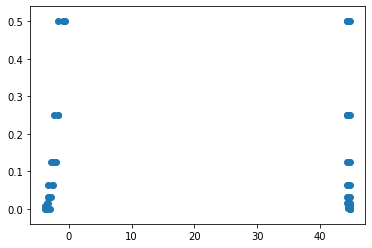

In [768]:
plt.scatter(snratios, tcs)
plt.show()

In [757]:
full_pca = full_image_pca(img, 8)

In [773]:
compressor, decompressor = transformations(full_pca, n_components=256*256)

In [774]:
mat = compressor(img)
recon_img = decompressor(mat)

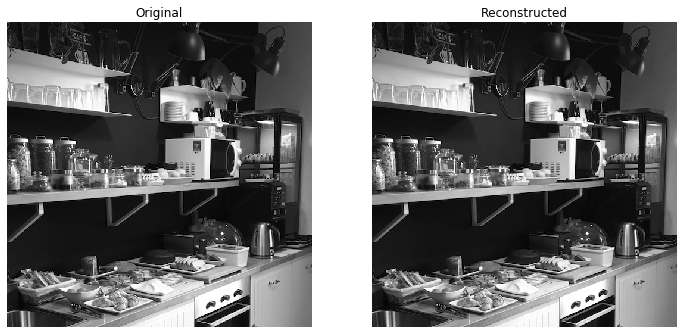

In [775]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize =(12,14))
cmap = plt.get_cmap('gray')
axes[0].imshow(img, cmap = cmap)
axes[0].axis('off')
axes[0].set(title='Original')
axes[1].imshow(recon_img, cmap = cmap)
axes[1].axis('off')
axes[1].set(title='Reconstructed')
plt.show()

In [776]:
snr(img, recon_img)

44.683451208061236

In [780]:
tcost(8, 32768, img)

0.5